In [473]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [474]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [475]:
## load my dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0
1,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
2,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
3,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
4,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0


In [476]:
## "0" = survived
## "1" = dead

df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

[Text(0, 0, '203'), Text(0, 0, '96')]

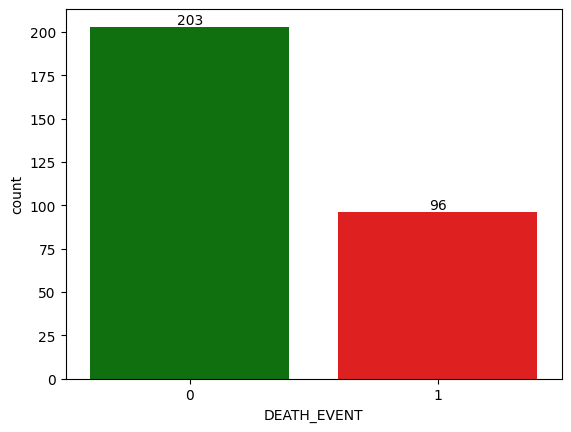

In [477]:
# Create a bar chart to visualise ghow mnay patients survived and how many died
cols= ['green','red'] ## defines the two colours used 
ax = sns.countplot(x=df["DEATH_EVENT"], palette= cols) ## creates the count chart for the DEATH_EVENT column with x being the death event (0 and 1)
ax.bar_label(ax.containers[0])

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [479]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [480]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: >

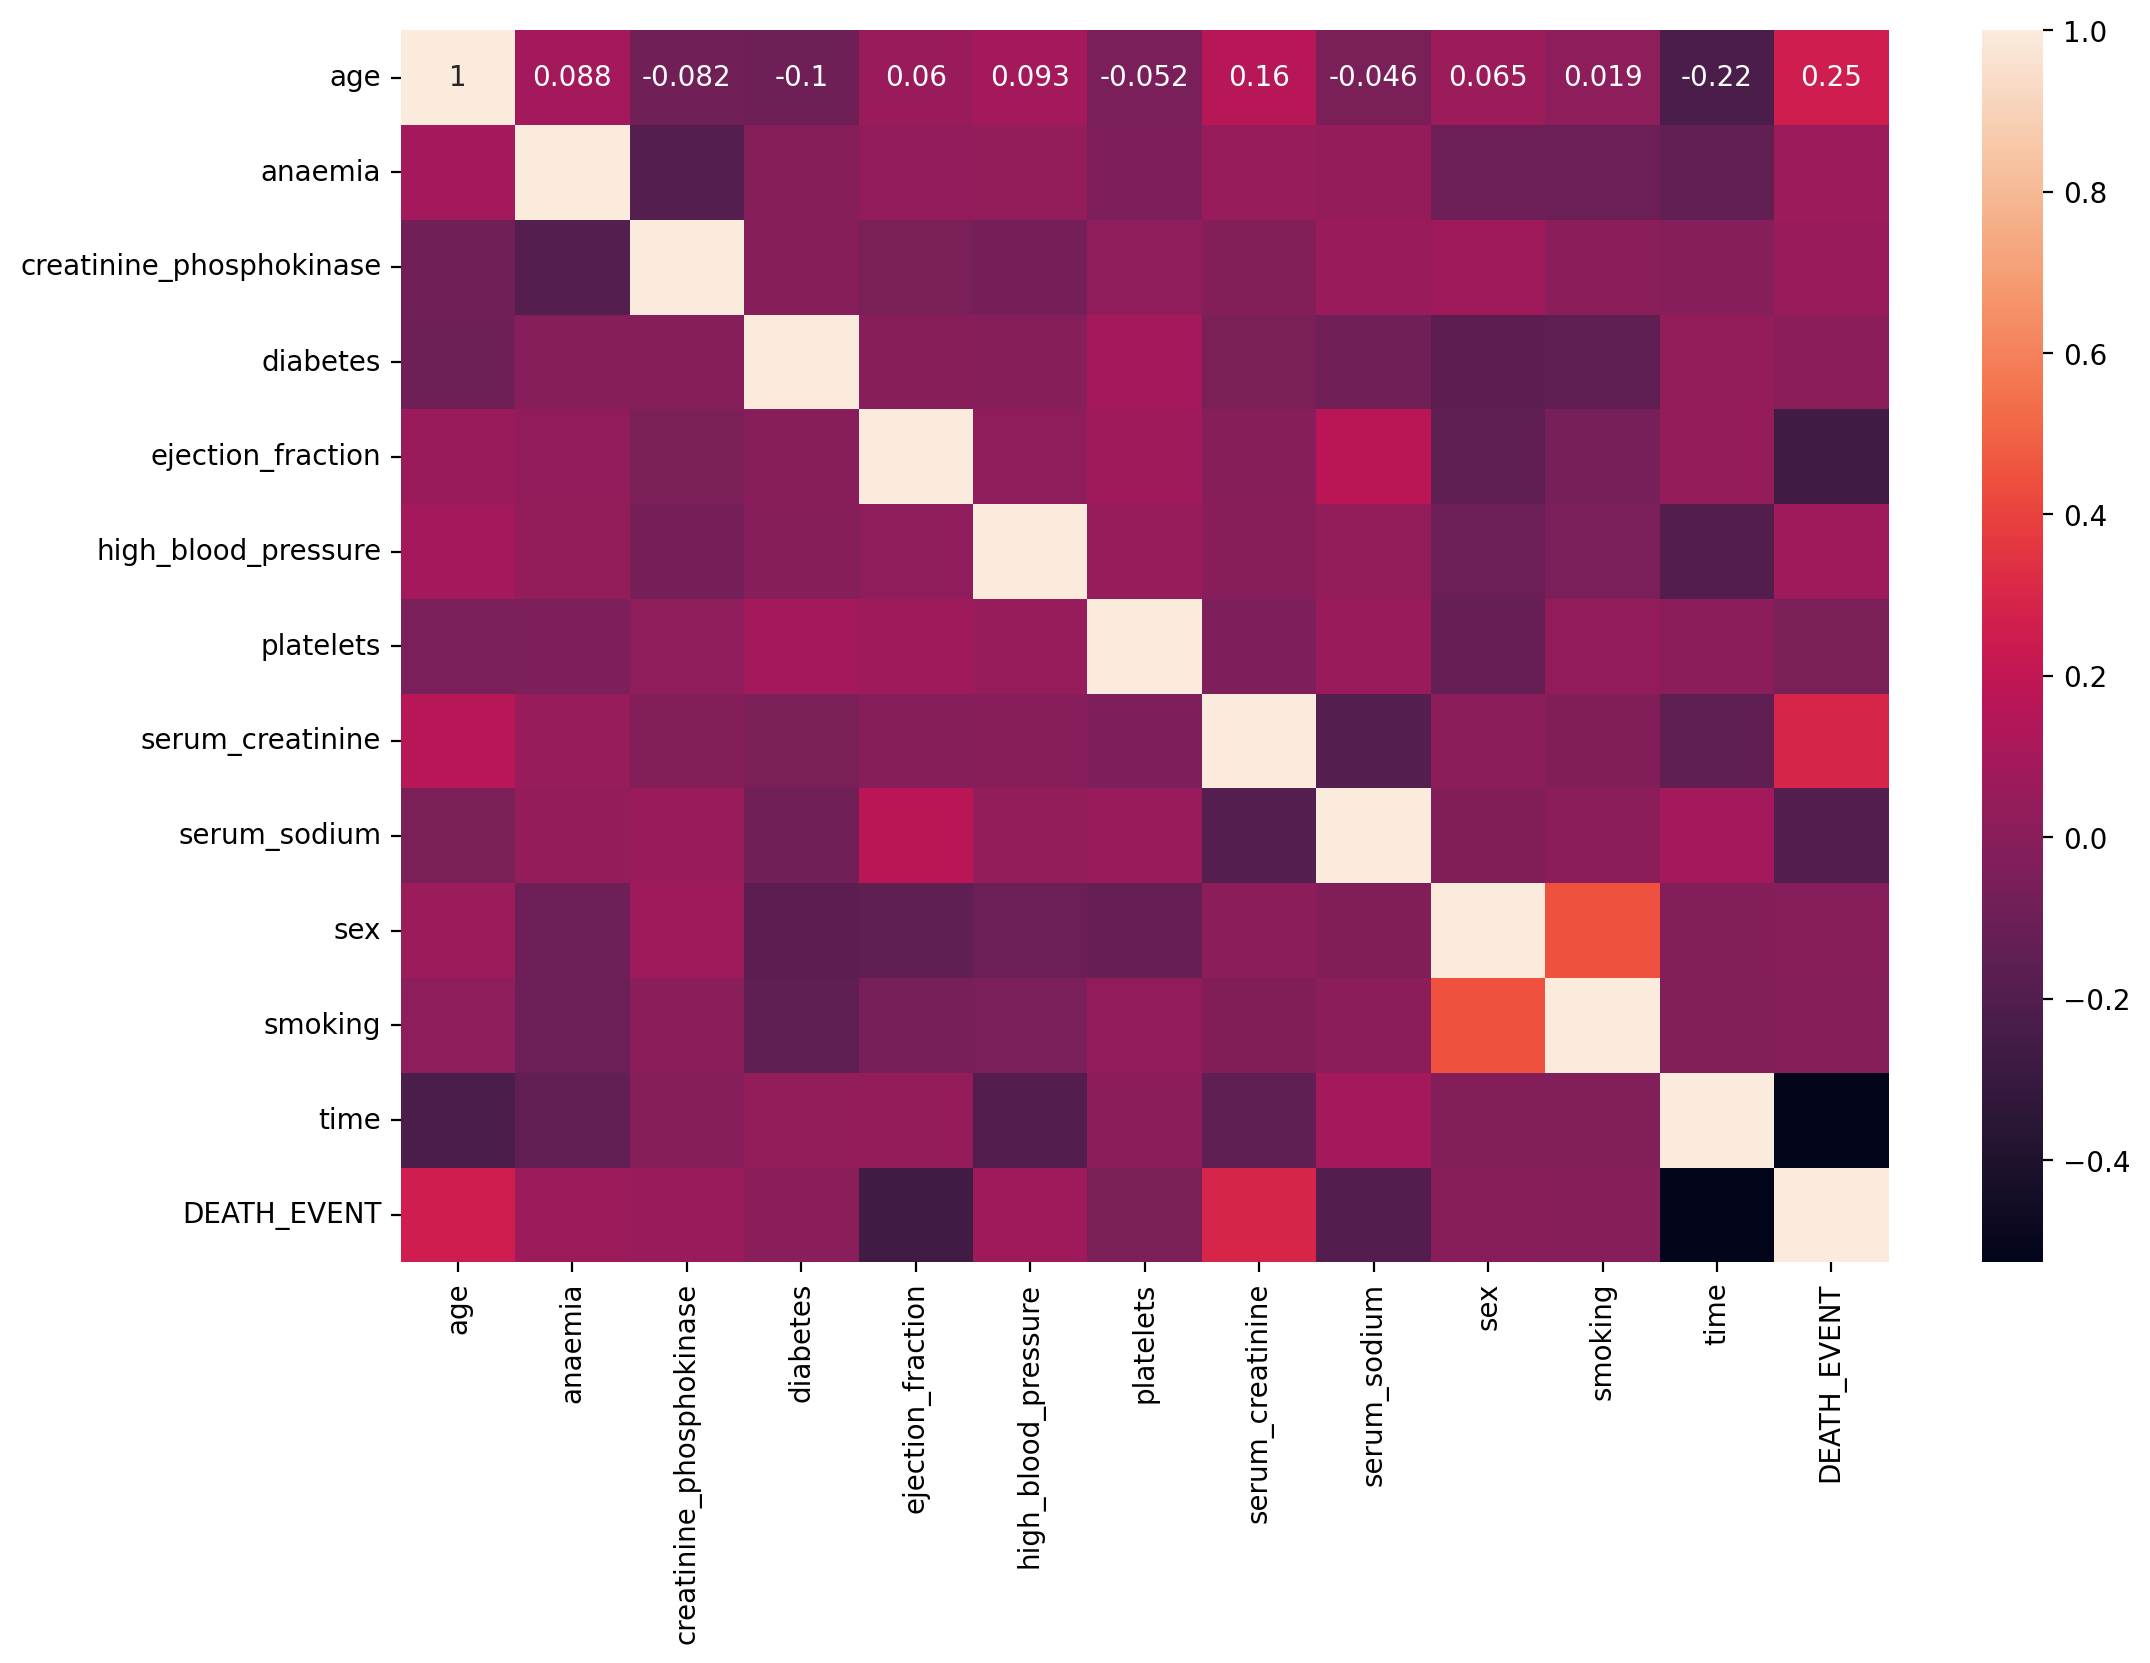

In [481]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(), annot = True)

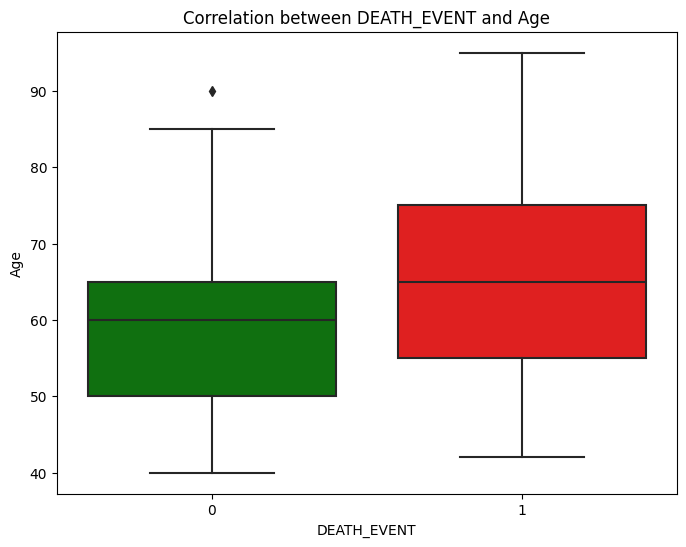

In [482]:
## Relation between age and death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df, palette=cols)
plt.title('Correlation between DEATH_EVENT and Age')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Distribution Of Age')

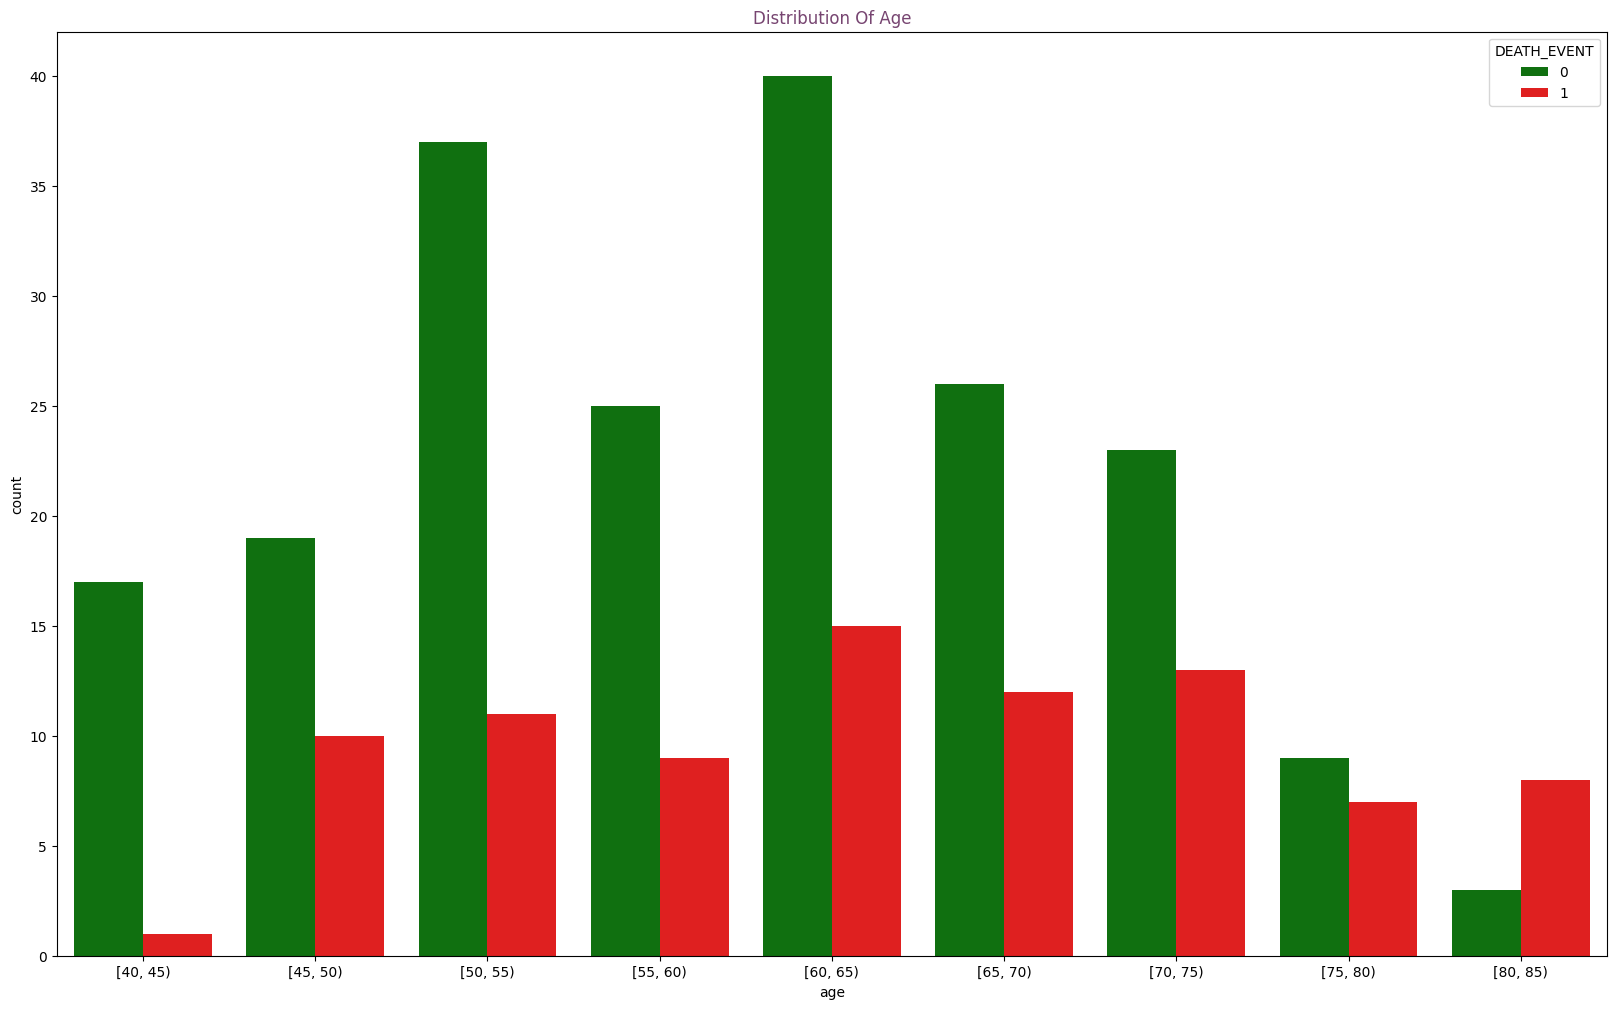

In [483]:
## Evaluating age distribution as per the deaths happened
## The highest chances of dying are between 50 and 75 years old 
plt.figure(figsize=(20,12))
age_intervals = pd.cut(df['age'], bins=range(40, 90, 5), right=False)
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype(str)
death_by_age=sns.countplot(x=age_intervals,data=df, hue ="DEATH_EVENT",palette = cols)
death_by_age.set_title("Distribution Of Age", color="#774571")

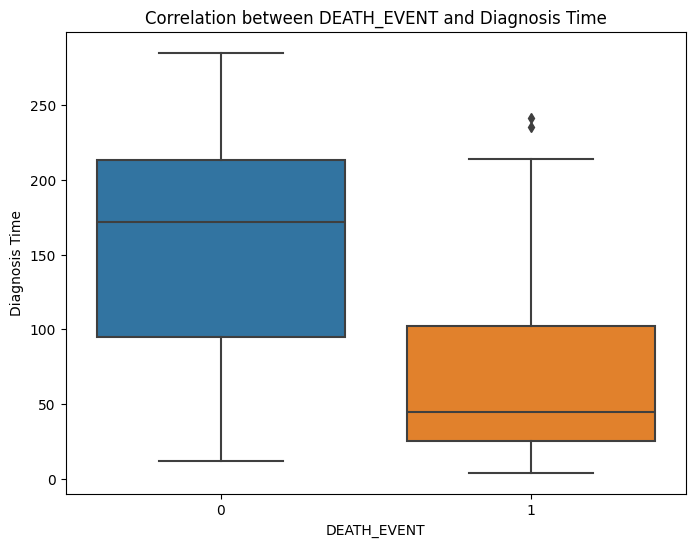

In [484]:
## Relation between diagnosis time and death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.title('Correlation between DEATH_EVENT and Diagnosis Time')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Diagnosis Time')
plt.show()

Text(0.5, 1.0, 'Relation between diagnosis Time and Death Event')

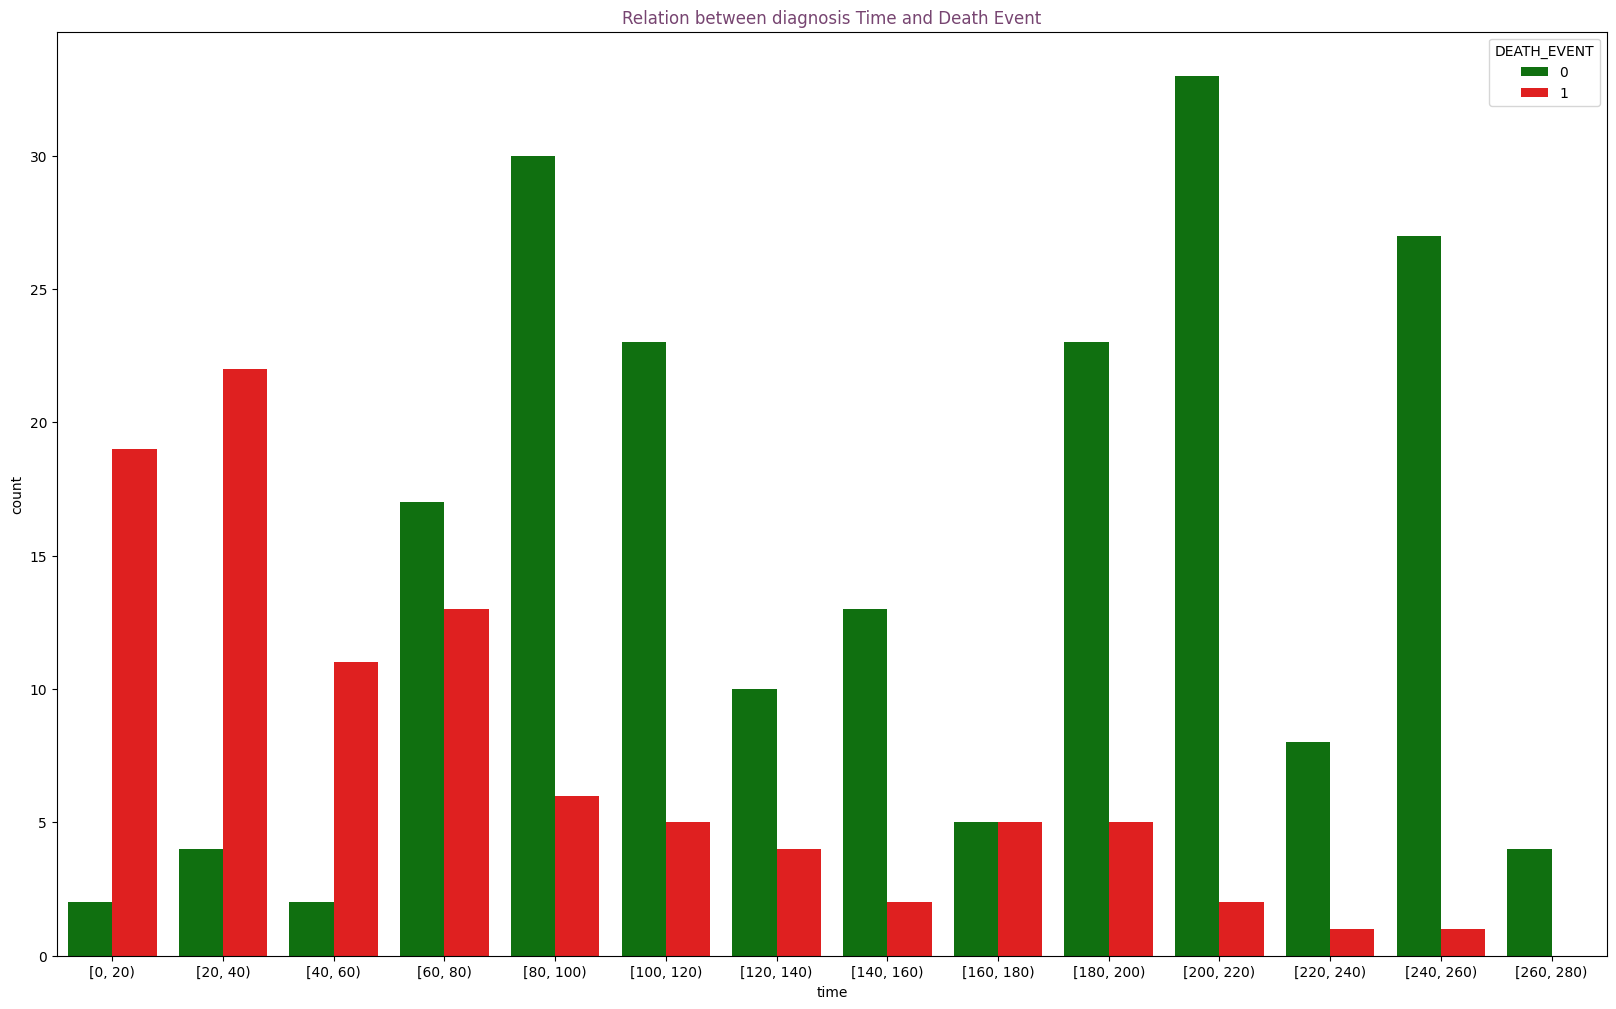

In [485]:
## Evaluating time (early diagnosis) distribution as per the deaths happened
## I'm not sure tie is actually a very reliable varible in theis analysis because I think time actually refers to "time under observation"
## obviously if the time under observation increases that the number of deaths decreases
## so for example if the study is for 260 days, the people who survived until the end will all have death_event = 0 but the people who died in the first few days will all have death_event = 1.
plt.figure(figsize=(20,12))
time_intervals = pd.cut(df['time'], bins=range(0, 290, 20), right=False)
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype(str)
death_by_time=sns.countplot(x=time_intervals,data=df, hue ="DEATH_EVENT",palette = cols)
death_by_time.set_title("Relation between diagnosis Time and Death Event", color="#774571")

Text(0.5, 1.0, 'Relation between Ejection Fraction and Death Event')

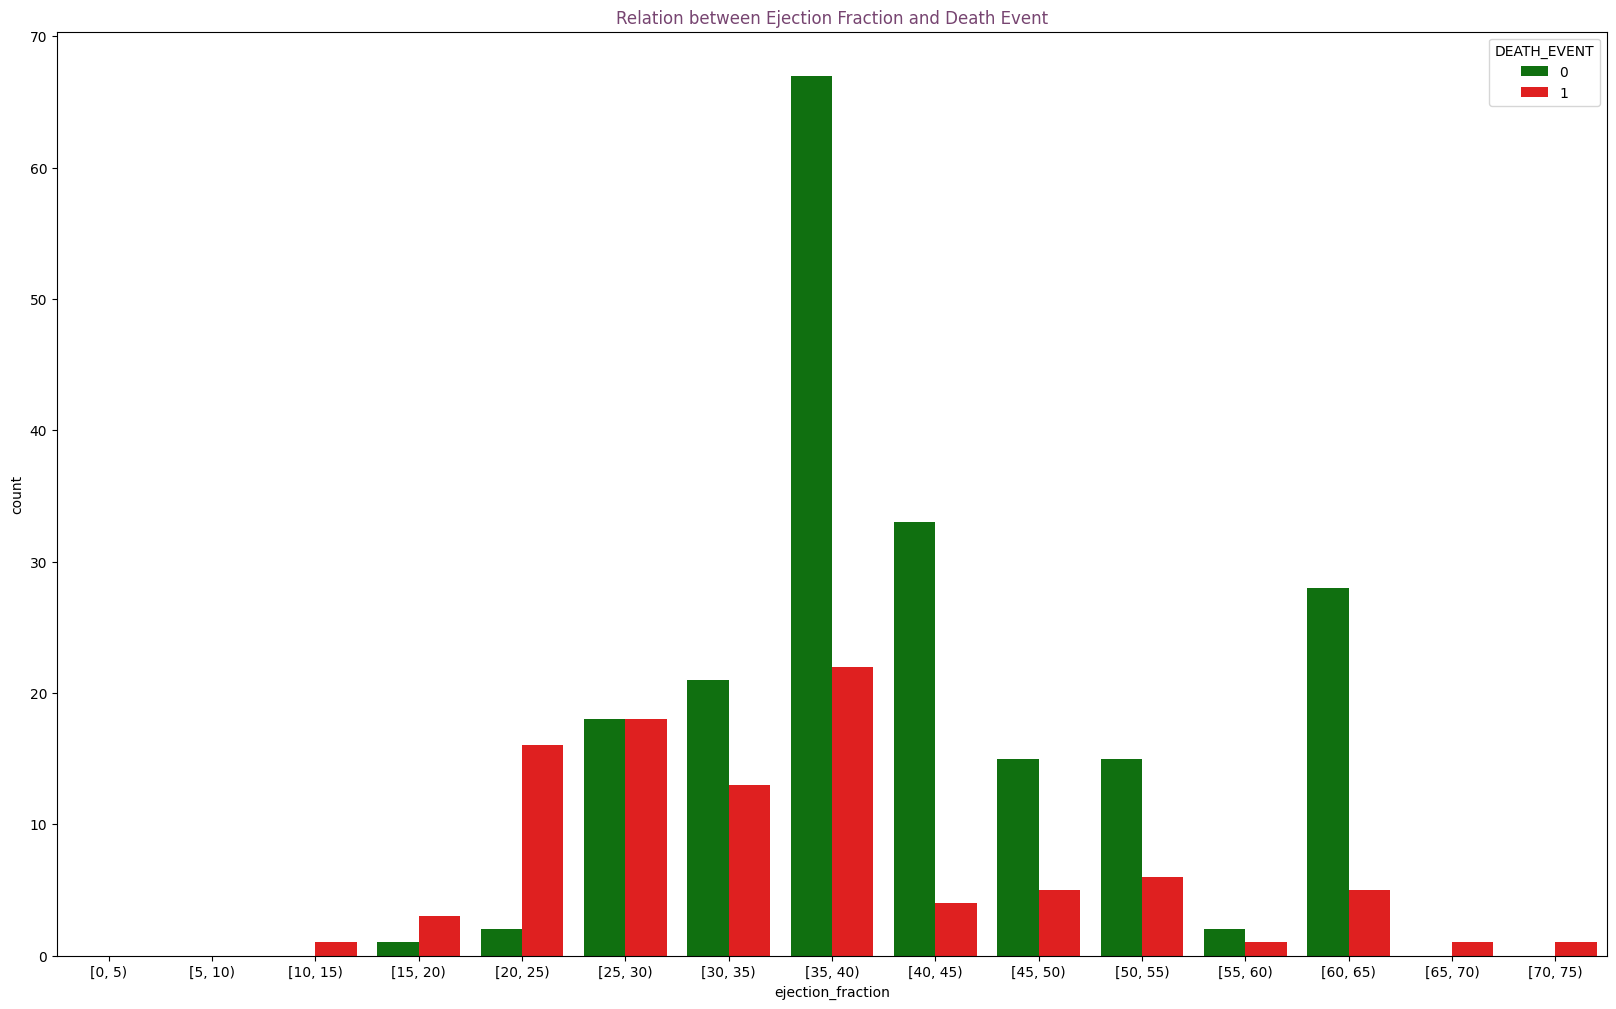

In [486]:
## Evaluating the relationship betwenn Ejection Fraction and the proability of dying of heart failure
## An EF of 55-70% is considered normal for a healthy heart.
## An EF less than 40% may indicate heart dysfunction or heart failure.
## An EF between 40% and 50% is considered borderline and may indicate some degree of heart dysfunction. 
plt.figure(figsize=(20,12))
ejection_fraction= pd.cut(df['ejection_fraction'], bins=range(0, 80, 5), right=False)
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype(str)
death_by_ejection=sns.countplot(x=ejection_fraction,data=df, hue ="DEATH_EVENT",palette = cols)
death_by_ejection.set_title("Relation between Ejection Fraction and Death Event", color="#774571")

Text(0.5, 1.0, 'Relation between Serum Sodium and Death Event')

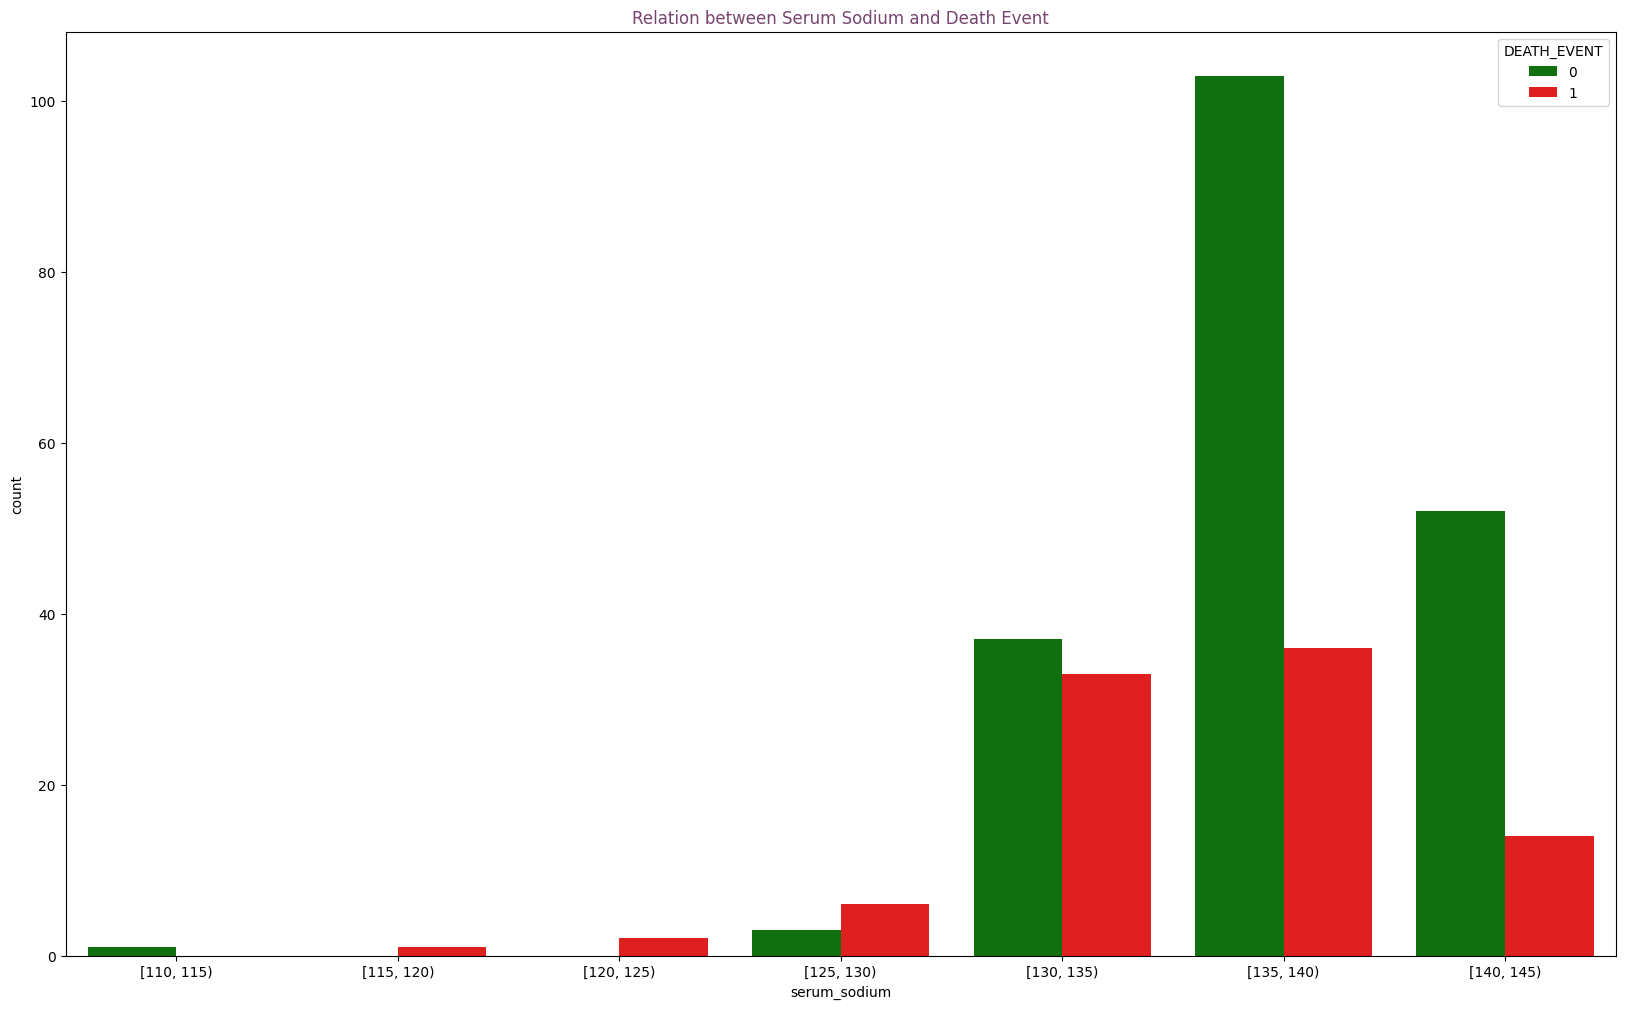

In [487]:
## Evaluating the relationship betwenn Serum Sodium and the proability of dying of heart failure
## The normal range for serum sodium (Na+) levels in adults typically falls within the range of 135 to 145 milliequivalents per liter (mEq/L)
## You can see the heart failure is less likely when Serum Sodium is between these levels
plt.figure(figsize=(20,12))
serum_sodium = pd.cut(df['serum_sodium'], bins=range(110, 150, 5), right=False)
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype(str)
death_by_sodium=sns.countplot(x=serum_sodium,data=df, hue ="DEATH_EVENT",palette = cols)
death_by_sodium.set_title("Relation between Serum Sodium and Death Event", color="#774571")

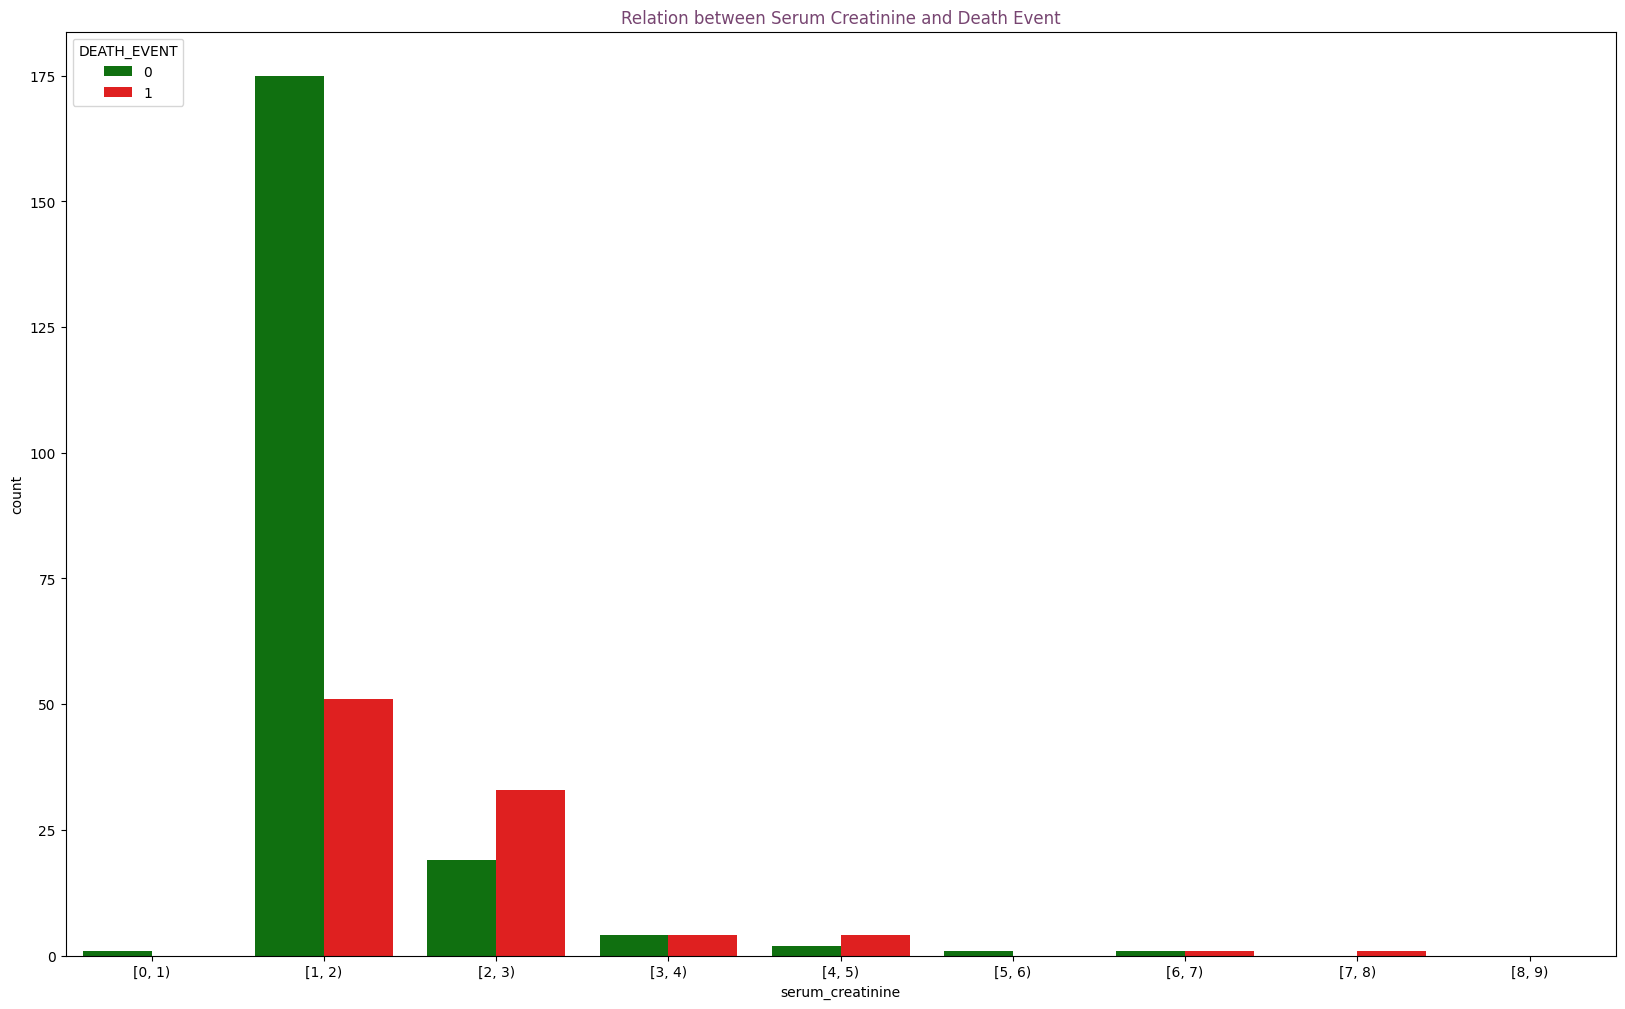

In [488]:
## Evaluating the relationship betwenn Serum Creatine and the proability of dying of heart failure
## The changes of dying proportionaly decrease with the increase in Serum Creatine
## Normal Serum Creatinine Range: 0.6-1.3 mg/dL
## You can see that while the serum creatinine is betwen the normal levels the chances of survival are much higher. Once it passes 2 mg/dL the chances are reversed.
plt.figure(figsize=(20, 12))
# Round 'serum_creatinine' values to the nearest integer
df['serum_creatinine'] = df['serum_creatinine'].round().astype(int)
# Create creatinine intervals with a step of 5
creatinine_intervals = pd.cut(df['serum_creatinine'], bins=range(0,10), right=False)
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype(str)
death_by_creatinine = sns.countplot(x=creatinine_intervals, data=df, hue="DEATH_EVENT", palette=cols)
death_by_creatinine.set_title("Relation between Serum Creatinine and Death Event", color="#774571")
plt.show()








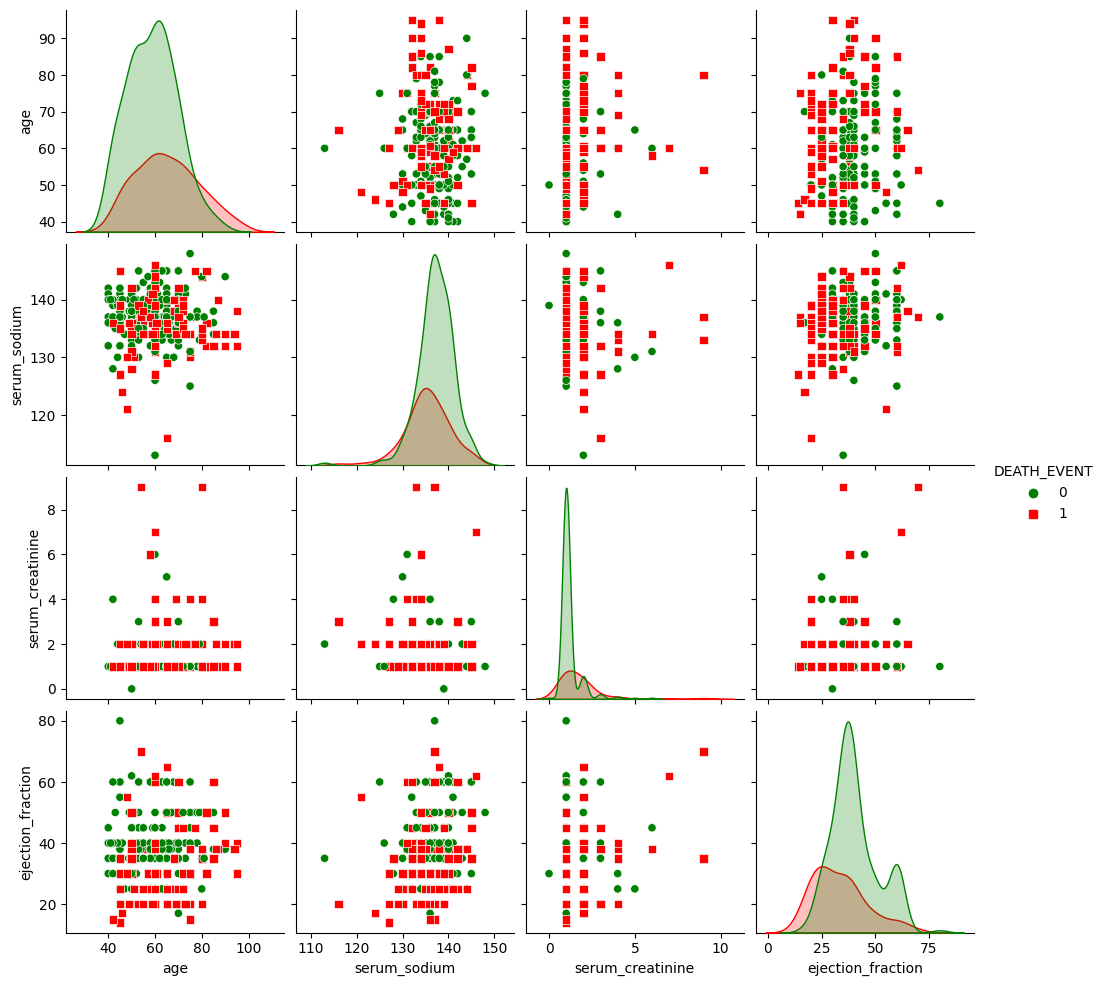

In [489]:

# Assuming you have a DataFrame called 'df' with the specified columns

# Select the columns of interest
selected_columns = ['age', 'serum_sodium', 'serum_creatinine', 'ejection_fraction', 'DEATH_EVENT']

# Create a pair plot
sns.pairplot(df[selected_columns], hue='DEATH_EVENT', palette=cols, markers=["o", "s"])
plt.show()

<Axes: xlabel='age'>

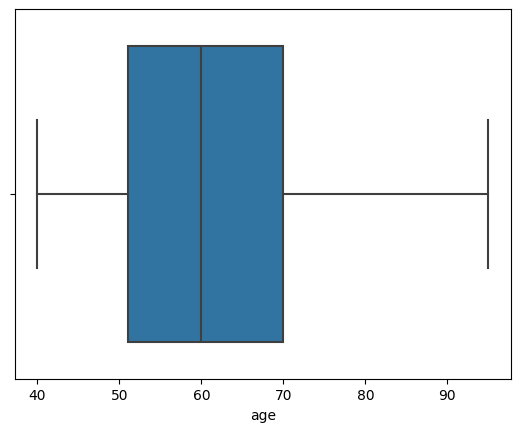

In [490]:
## Outliers

# Create a boxplot for each column
sns.boxplot(x=df['age'])



<Axes: xlabel='creatinine_phosphokinase'>

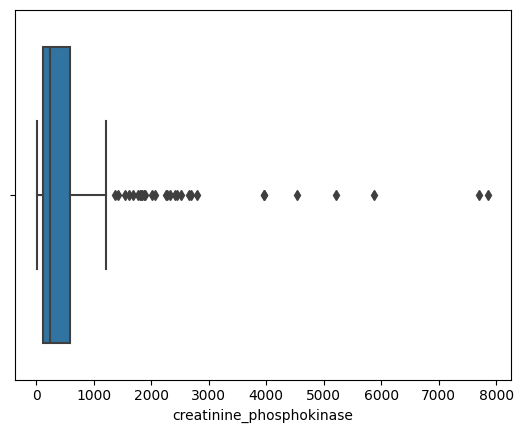

In [491]:
sns.boxplot(x=df['creatinine_phosphokinase'])
## Normal value for this type of creatinine is 22 to 198 units per liter (U/L) but because I don't know what unit measures were used for the moment I'm keepin the outliers

<Axes: xlabel='ejection_fraction'>

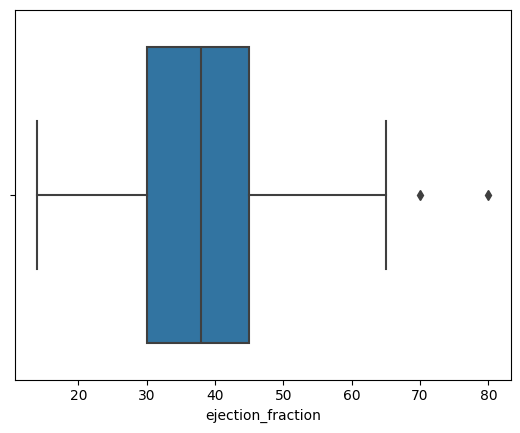

In [492]:
sns.boxplot(x=df['ejection_fraction'])

<Axes: xlabel='platelets'>

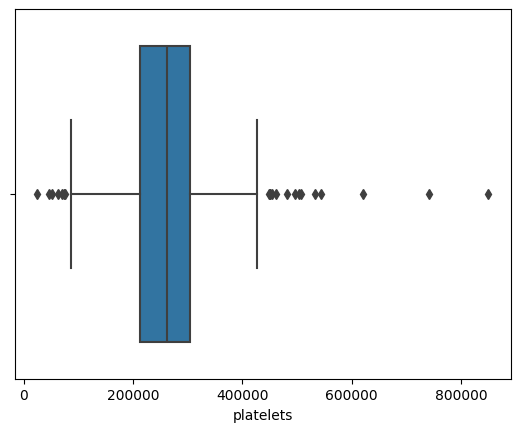

In [493]:
sns.boxplot(x=df['platelets'])

<Axes: xlabel='serum_creatinine'>

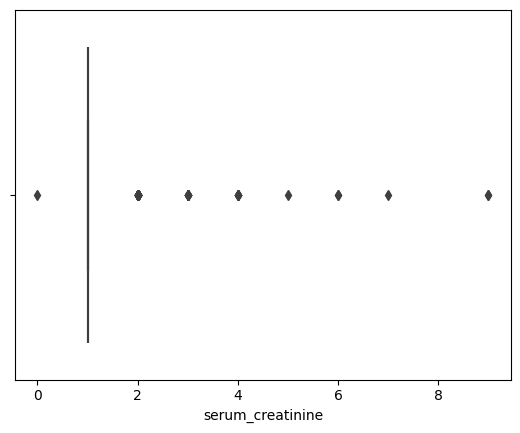

In [494]:
sns.boxplot(x=df['serum_creatinine'])

<Axes: xlabel='serum_sodium'>

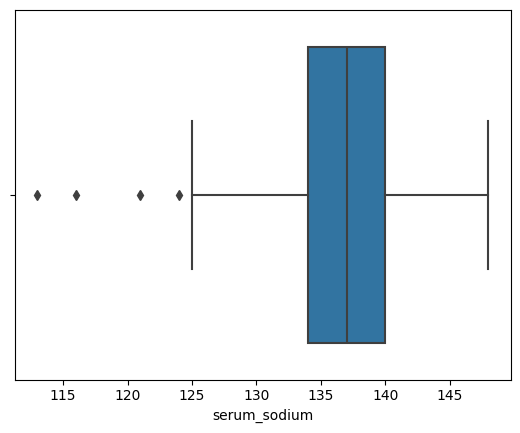

In [495]:
sns.boxplot(x=df['serum_sodium'])

In [496]:
## splitting the data into dependent and independent variable

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [497]:
## split the data into train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [498]:
X_train

array([[ 61.,   1.,  84., ...,   0.,   0., 110.],
       [ 54.,   1., 427., ...,   0.,   0., 196.],
       [ 60.,   1., 754., ...,   1.,   0.,  91.],
       ...,
       [ 70.,   0., 212., ...,   1.,   1., 188.],
       [ 52.,   1., 191., ...,   1.,   1., 216.],
       [ 69.,   0., 582., ...,   1.,   0.,  30.]])

In [499]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [500]:
## train the model
model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [501]:
## make prediction
LR_pred = model_LR.predict(X_test_scaled)

In [502]:
## PUTTING THE ACTUAL AND PREDICTED IN A DATAFRAME
pd.DataFrame({'Actual': y_test, 'Predicted': LR_pred})

,Actual,Predicted
0,0,0
1,0,1
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,1
9,1,0


In [503]:
## model evaluation
accuracy_LR = accuracy_score(y_test, LR_pred )

## confusion matrix
conf_mat = confusion_matrix(y_test, LR_pred)


print(accuracy_LR)
print(conf_mat)

0.7666666666666667
[[37  7]
 [ 7  9]]


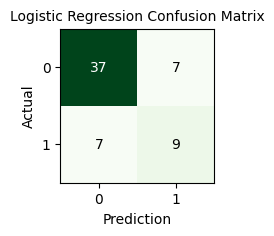

In [504]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

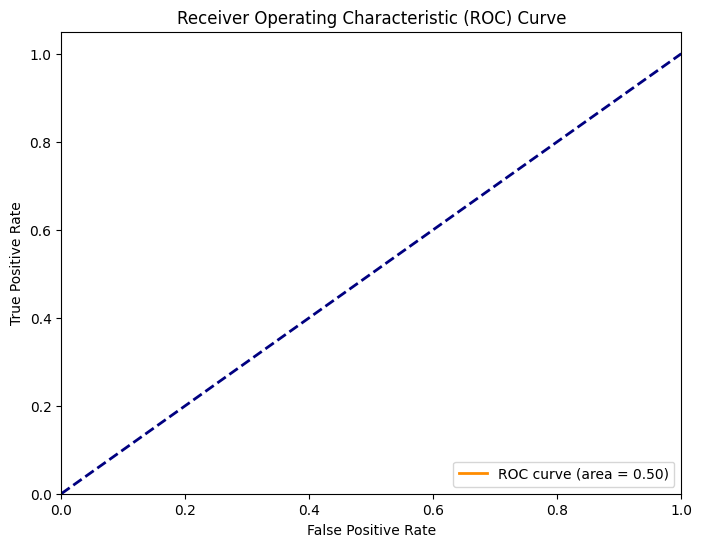

In [505]:
auc_LR = roc_auc_score(y_test, LR_pred)
probabilities = model_LR.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, probabilities, pos_label=1)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [506]:
## classification report
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.56      0.56      0.56        16

    accuracy                           0.77        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.77      0.77      0.77        60



In [507]:
## PROBABILITIES
# Calculate the predicted probabilities of survival
probabilities = model_LR.predict_proba(X_test)

# The second column of 'probabilities' contains the probability of survival
probability_of_survival = probabilities[:, 1]

# Print the predicted probabilities
print("Predicted Probabilities of Survival:")
print(probability_of_survival)

df_probabilities = pd.DataFrame({'Probability of Survival': probability_of_survival})
df_probabilities['Probability of Survival'] = df_probabilities['Probability of Survival'] * 100
print(df_probabilities)


Predicted Probabilities of Survival:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    Probability of Survival
0                       0.0
1                       0.0
2                       0.0
3                       0.0
4                       0.0
5                       0.0
6                       0.0
7                       0.0
8                       0.0
9                       0.0
10                      0.0
11                      0.0
12                      0.0
13                      0.0
14                      0.0
15                      0.0
16                      0.0
17                      0.0
18                      0.0
19                      0.0
20                      0.0
21                      0.0
22                      0.0
23                      0.0
24                      0.0
25                      0.0
26                     

In [508]:
# Assuming you have your predicted probabilities in a variable (e.g., probability_of_survival)
data = {'Probability of Survival': probability_of_survival}
df_probabilities = pd.DataFrame(data)

# Specify the path where you want to save the CSV file
csv_file_path = 'predicted_probabilities.csv'

# Save the DataFrame to a CSV file
df_probabilities.to_csv(csv_file_path, index=False)

In [509]:
scaler = StandardScaler()
X_scaled_ann = scaler.fit_transform(X_train)


#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

## Initialize the model of neural network
model = Sequential()

## input layers---unit is the number of neurons, more unit more complex pattern, it may lead to overfitting--depend on the complexity of model--
# starting n=16 a big as my parameter--the next paramert is canaliser which is uniform, the next 
# Relu is activation function, changes the negative numbers to zero, introduce liniarity in our network
#we saw our x_train was 3000 and our dependent was the last one
model.add(Dense(units= 16, kernel_initializer = 'uniform', activation = 'relu',input_dim = 12))


## hidden layers, the first neuron was 16 so the second layer we make it half =8 and we don't need input_dim
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))

## regularization--which help us to stop overfitting- we need to select the percentage of dropout like 25%
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

##Output 
# Layer- when we work with binary classification that we have only 2 labels then n=1 
# if we work with a multiclass classification n will be based on how many class we have
# the activation also will change from relu to sigmoid( because it is binary and the result is 0 and 1)
model.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [510]:
## compile the network that has been defined
##optimizer is the one use for optimizing_ adam is very efficient and adaptfuly
##the loss is where the model tries to minimize the error at the point of training, here is binary so we use binary crossentropy
# if we have multiple classification we need to use categorigal cross entropy
# the popular approach for metrics is accuracy but we
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [511]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                208       
                                                                 
 dense_41 (Dense)            (None, 8)                 136       
                                                                 
 dropout_18 (Dropout)        (None, 8)                 0         
                                                                 
 dense_42 (Dense)            (None, 8)                 72        
                                                                 
 dropout_19 (Dropout)        (None, 8)                 0         
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 425 (1.66 KB)
Trainable params: 425 (1.

In [512]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [513]:
## train the network--train the data batch by batch, based on experiment here =32
## epochs, need to be careful if it is small it will be underfitting if it high may be overfitting 
## for validation data we may use test data sometime we use validation split not only test set
## we can say validation_split =(X-test, y_test) or some percent of whole sample
history = model.fit(X_scaled_ann, y_train_encoded, batch_size = 25, epochs = 80, validation_split = 0.25)

## history = model.fit(X_train, y_train, batch_size = 25, epochs = 80,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/80


8/8 [==============================] - 1s 25ms/step - loss: 0.6926 - accuracy: 0.6648 - val_loss: 0.6921 - val_accuracy: 0.6167
Epoch 2/80
8/8 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.6816 - val_loss: 0.6912 - val_accuracy: 0.6167
Epoch 3/80
8/8 [==============================] - 0s 6ms/step - loss: 0.6895 - accuracy: 0.6816 - val_loss: 0.6902 - val_accuracy: 0.6167
Epoch 4/80
8/8 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.6816 - val_loss: 0.6892 - val_accuracy: 0.6167
Epoch 5/80
8/8 [==============================] - 0s 5ms/step - loss: 0.6861 - accuracy: 0.6816 - val_loss: 0.6880 - val_accuracy: 0.6167
Epoch 6/80
8/8 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.6816 - val_loss: 0.6867 - val_accuracy: 0.6167
Epoch 7/80
8/8 [==============================] - 0s 8ms/step - loss: 0.6823 - accuracy: 0.6816 - val_loss: 0.6850 - val_accuracy: 0.6167
Epoch 8/80
8/8 [============================

In [514]:
## Save my model--- give it a name
model.save('ann_model')

INFO:tensorflow:Assets written to: ann_model\assets


INFO:tensorflow:Assets written to: ann_model\assets


In [515]:
##Load saved model-we want to see our saved model
ann_model = tf.keras.models.load_model('ann_model')

In [535]:
## model prediction on the test data---before we just said model predict but here has been save in a file so we 
X_test_scaled_ann = scaler.transform(X_test)
y_pred_ann = ann_model.predict(X_test_scaled_ann)
y_pred_ann

2/2 [==============================] - 0s 12ms/step


array([[7.4951253e-03],
       [7.7009439e-01],
       [4.1652313e-01],
       [1.5621992e-03],
       [1.8254304e-02],
       [5.5407131e-01],
       [9.9755473e-02],
       [2.1231318e-02],
       [6.7909449e-01],
       [6.3889003e-01],
       [8.0767963e-03],
       [6.3519800e-01],
       [1.6132576e-02],
       [3.0906414e-04],
       [2.0426378e-01],
       [1.6174783e-01],
       [7.2671741e-01],
       [7.6540482e-01],
       [1.1634885e-03],
       [8.7694643e-06],
       [1.8345210e-04],
       [4.1826190e-03],
       [1.3911631e-04],
       [6.8419678e-05],
       [4.4492121e-05],
       [1.3460508e-03],
       [3.7068292e-02],
       [1.7248587e-01],
       [9.1223979e-01],
       [8.0030918e-01],
       [3.0919001e-04],
       [1.5823171e-01],
       [3.1356660e-03],
       [8.3426374e-01],
       [3.5152555e-04],
       [2.0295350e-04],
       [9.1106039e-01],
       [7.5862098e-01],
       [3.9509612e-01],
       [4.6441029e-03],
       [5.3879440e-02],
       [7.851221

In [536]:
## set a threshold-- we need to put it in this variable....
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)  ## if it is bigger than 0.5 put 1 , else put 0
y_pred_ann

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [537]:
y_test

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0]

In [538]:
y_pred_ann.shape

(60, 1)

In [540]:
y_test.shape

AttributeError: 'list' object has no attribute 'shape'

In [541]:
## flatten ---inserting the changes in them , we don't use the new name it will be confuesing
y_pred_ann = y_pred_ann.flatten()

In [542]:
### put them in datafram
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
0,0,0
1,0,1
2,1,0
3,0,0
4,0,0
5,0,1
6,0,0
7,1,0
8,0,1
9,1,1


In [543]:
# Convert both y_test and y_pred_ann to integers
y_test = [int(label) for label in y_test]
y_pred_ann = [int(label) for label in y_pred_ann]



In [544]:
## classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.53      0.62      0.57        16

    accuracy                           0.75        60
   macro avg       0.69      0.71      0.70        60
weighted avg       0.77      0.75      0.76        60



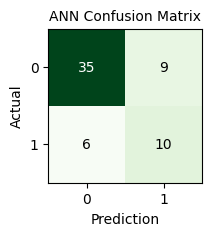

"# Calculate the confusion matrix\nconf_mat_ann = confusion_matrix(y_test, y_pred_ann)\n\n# Create a figure and axis for the confusion matrix plot\nplt.figure(figsize=(6, 4))\nax = plt.gca()\n\n# Plot the confusion matrix as a table\ncax = ax.matshow(conf_mat_ann, cmap=plt.cm.Greens)\nplt.colorbar(cax)\n\n# Set axis labels and title\nax.set_xlabel('Predicted', fontsize=12)\nax.set_ylabel('Actual', fontsize=12)\nax.set_title('Confusion Matrix', fontsize=14)\n\n# Display the plot\nplt.show() "

In [554]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat_ann = confusion_matrix(y_test, y_pred_ann)

## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_ann, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('ANN Confusion Matrix', fontsize = 10)
plt.show()



In [555]:
print(conf_mat_ann)

[[35  9]
 [ 6 10]]


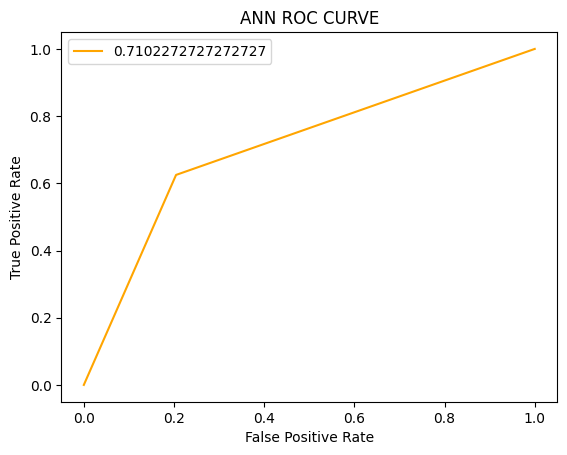

In [548]:
auc_ann= roc_auc_score(y_test, y_pred_ann)
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE')
plt.legend()
plt.show()

In [549]:
auc_ann

0.7102272727272727

In [550]:
## SUPPORT VECTOR MACHINE 

clflinear = svm.SVC(kernel = 'linear')
clfsigmoid = svm.SVC(kernel = 'sigmoid')
clfrbf = svm.SVC(kernel = 'rbf')

In [551]:
## fir the model
clflinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [552]:
y_pred_linear = clflinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [553]:
y_pred_linear = [int(label) for label in y_pred_linear]
y_pred_sigmoid = [int(label) for label in y_pred_sigmoid]
y_pred_rbf = [int(label) for label in y_pred_rbf]

print('Accuracy(Linear Kernel):', metrics.accuracy_score(y_test, y_pred_linear))
print('Accuracy(Sigmoid Kernel):', metrics.accuracy_score(y_test, y_pred_sigmoid))
print('Accuracy(RBF Kernel):', metrics.accuracy_score(y_test, y_pred_rbf))

print(classification_report(y_test, y_pred_sigmoid))


Accuracy(Linear Kernel): 0.8166666666666667
Accuracy(Sigmoid Kernel): 0.6
Accuracy(RBF Kernel): 0.7333333333333333
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        44
           1       0.17      0.12      0.14        16

    accuracy                           0.60        60
   macro avg       0.44      0.45      0.44        60
weighted avg       0.56      0.60      0.58        60



In [533]:

from sklearn import svm

# Create SVM models for different kernels
clf_linear = svm.SVC(kernel='linear')
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_rbf = svm.SVC(kernel='rbf')

# Fit the models
clf_linear.fit(X_train, y_train)
clf_sigmoid.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)

# Make predictions using the SVM models for different kernels
predictions_svm_linear = clf_linear.predict(X_test)
predictions_svm_sigmoid = clf_sigmoid.predict(X_test)
predictions_svm_rbf = clf_rbf.predict(X_test)

# Convert the predicted labels to integers
predictions_svm_linear = [int(label) for label in predictions_svm_linear]
predictions_svm_sigmoid = [int(label) for label in predictions_svm_sigmoid]
predictions_svm_rbf = [int(label) for label in predictions_svm_rbf]

# Evaluate the performance for each kernel type
accuracy_linear = accuracy_score(y_test, predictions_svm_linear)
accuracy_sigmoid = accuracy_score(y_test, predictions_svm_sigmoid)
accuracy_rbf = accuracy_score(y_test, predictions_svm_rbf)

print('Accuracy (Linear SVM):', accuracy_linear)
print('Accuracy (Sigmoid SVM):', accuracy_sigmoid)
print('Accuracy (RBF SVM):', accuracy_rbf)

# Generate the classification reports for each kernel type
classification_report_linear = classification_report(y_test, predictions_svm_linear)
classification_report_sigmoid = classification_report(y_test, predictions_svm_sigmoid)
classification_report_rbf = classification_report(y_test, predictions_svm_rbf)

print('Classification Report (Linear SVM):\n', classification_report_linear)
print('Classification Report (Sigmoid SVM):\n', classification_report_sigmoid)
print('Classification Report (RBF SVM):\n', classification_report_rbf)






Accuracy (Linear SVM): 0.8166666666666667
Accuracy (Sigmoid SVM): 0.6
Accuracy (RBF SVM): 0.7333333333333333
Classification Report (Linear SVM):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        44
           1       0.69      0.56      0.62        16

    accuracy                           0.82        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.81      0.82      0.81        60

Classification Report (Sigmoid SVM):
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        44
           1       0.17      0.12      0.14        16

    accuracy                           0.60        60
   macro avg       0.44      0.45      0.44        60
weighted avg       0.56      0.60      0.58        60

Classification Report (RBF SVM):
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        44
           1       